In [ ]:
import cv2
import mmcv.ops
import mmdet
from mmdet.apis import init_detector, inference_detector
from mmcv.transforms import Compose
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS

/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Follow demo

In [2]:
collect_env = mmcv.utils.collect_env()
print("mmdet version", mmdet.__version__)
collect_env

mmdet version 3.0.0


OrderedDict([('sys.platform', 'linux'),
             ('Python', '3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'),
             ('CUDA available', True),
             ('numpy_random_seed', 2147483648),
             ('GPU 0', 'GeForce RTX 2080 Ti'),
             ('CUDA_HOME', '/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1'),
             ('NVCC', 'Cuda compilation tools, release 11.6, V11.6.124'),
             ('GCC', 'gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0'),
             ('PyTorch', '1.13.1+cu116'),
             ('PyTorch compiling details',
              'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201402\n  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.6\n 

In [19]:
config_file = 'mmdetection/configs/dino/dino-5scale_swin-l_8xb2-36e_coco.py'
checkpoint_file = 'pretrained_models/dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cpu'
# inference_detector(model, 'demo/demo.jpg')

Loads checkpoint by local backend from path: pretrained_models/dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth


In [2]:
model

DINO(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): SwinTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (stages): ModuleList(
      (0): SwinBlockSequence(
        (blocks): ModuleList(
          (0): SwinBlock(
            (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
            (attn): ShiftWindowMSA(
              (w_msa): WindowMSA(
                (qkv): Linear(in_features=192, out_features=576, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=192, out_features=192, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop): DropPath()
            )
            (norm

In [22]:
print(model.cfg.visualizer)
visualizer = VISUALIZERS.build(model.cfg.visualizer)

{'type': 'DetLocalVisualizer', 'vis_backends': [{'type': 'LocalVisBackend'}], 'name': 'visualizer'}
04/09 16:31:04 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8kif5_w_ because the default path (/home/guest/r11922a05/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [13]:
visualizer.dataset_meta = model.dataset_meta
visualizer.dataset_meta # classse and colors

{'classes': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted plant',
  'bed',
  'dining table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy bear',


In [15]:
img = 'demo.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img) # only supports single-image inference for now

/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [111]:
result

<DetDataSample(

    META INFORMATION
    batch_input_shape: (800, 1199)
    ori_shape: (427, 640)
    scale_factor: (1.8734375, 1.873536299765808)
    img_path: 'demo.jpg'
    pad_shape: (800, 1199)
    img_shape: (800, 1199)
    img_id: 0

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.9304, 0.9244, 0.8494, 0.8277, 0.7853, 0.7741, 0.6961, 0.6604, 0.6321,
                        0.6174, 0.6161, 0.5753, 0.5552, 0.5406, 0.5079, 0.5078, 0.4886, 0.4314,
                        0.3841, 0.3252, 0.3088, 0.2756, 0.2726, 0.2492, 0.2387, 0.2279, 0.2134,
                        0.2092, 0.2040, 0.1897, 0.1870, 0.1859, 0.1613, 0.1564, 0.1527, 0.1472,
                        0.1423, 0.1415, 0.1362, 0.1307, 0.1230, 0.1225, 0.1204, 0.1160, 0.1125,
                        0.1104, 0.1095, 0.1080, 0.1073, 0.1069, 0.1051, 0.1045, 0.1020, 0.1014,
                        0.1004, 0.0980, 0.0976, 0.0971, 

In [18]:
# Show the results
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')


visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True)

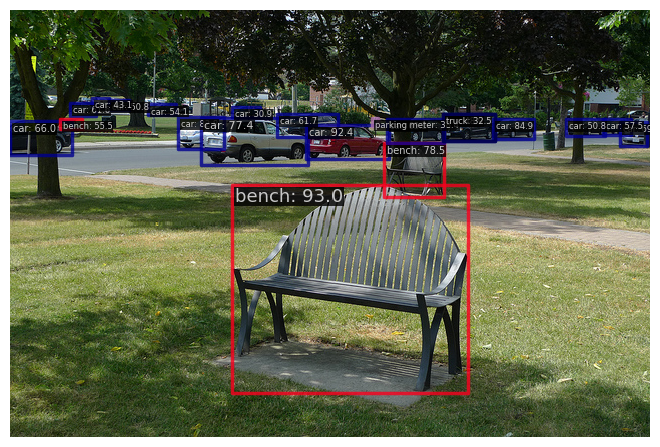

In [19]:
visualizer.show()

In [8]:
model.data_preprocessor

DetDataPreprocessor()

# Modify dataset settings

In [1]:
import torch
from torchsummary import summary

import mmengine
from mmengine import Config
from mmengine.runner import set_random_seed, Runner
from mmdet.apis import init_detector, inference_detector

/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cuda_device = 7
torch.cuda.set_device(cuda_device)

# Get the index of the current CUDA device
current_cuda_device = torch.cuda.current_device()
current_cuda_device

7

In [3]:
# Swin-L + DINO 5 scale
# cfg = Config.fromfile('mmdetection/configs/dino/dino-5scale_swin-l_8xb2-36e_coco.py')
# cfg.load_from = './pretrained_models/dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth'

# R-50 + DINO 4 scale
cfg = Config.fromfile('mmdetection/configs/dino/dino-4scale_r50_8xb2-12e_coco.py')
cfg.load_from = './pretrained_models/dino-4scale_r50_8xb2-12e_coco_20221202_182705-55b2bba2.pth'

cfg.dataset_type = 'CocoDataset'
cfg.data_root = './hw1_dataset/'

# train setting
cfg.train_dataloader['dataset']['type'] = cfg.dataset_type
cfg.train_dataloader['dataset']['data_root'] = cfg.data_root
cfg.train_dataloader['dataset']['ann_file'] = 'train/_annotations.coco.json'
cfg.train_dataloader['dataset']['data_prefix']['img'] = 'train/'

# valid setting
cfg.val_dataloader['dataset']['type'] = cfg.dataset_type
cfg.val_dataloader['dataset']['data_root'] = cfg.data_root
cfg.val_dataloader['dataset']['ann_file'] = 'valid/_annotations.coco.json'
cfg.val_dataloader['dataset']['data_prefix']['img'] = 'valid/'
cfg.val_evaluator['ann_file'] = cfg.data_root + 'valid/_annotations.coco.json'

# test setting
cfg.test_dataloader['dataset']['type'] = cfg.dataset_type
cfg.test_dataloader['dataset']['data_root'] = cfg.data_root
cfg.test_dataloader['dataset']['data_prefix']['img'] = 'test/'

In [4]:
cfg.test_evaluator = dict(
    type='CocoMetric',
    ann_file=None,
    metric=['bbox'],  # Metrics to be evaluated
    format_only=True,  # Only format and save the results to coco json file
    outfile_prefix='./ckpt/test_results',  # The prefix of output file
)

# Modify model settings
- optim_wrapper: optimizer
- param_scheduler: warmup

In [4]:
# config_file = 'mmdetection/configs/dino/dino-5scale_swin-l_8xb2-36e_coco.py'
# checkpoint_file = 'pretrained_models/dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth'
# model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

config_file = 'mmdetection/configs/dino/dino-4scale_r50_8xb2-12e_coco.py'
checkpoint_file = 'pretrained_models/dino-4scale_r50_8xb2-12e_coco_20221202_182705-55b2bba2.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: pretrained_models/dino-4scale_r50_8xb2-12e_coco_20221202_182705-55b2bba2.pth


In [5]:
print("Model parameters size (MB):", sum(p.numel() * p.element_size() for p in model.parameters()) / (1024**2))
print("Model buffers size (MB):", sum(b.numel() * b.element_size() for b in model.buffers()) / (1024**2))

Model parameters size (MB): 181.9702606201172
Model buffers size (MB): 0.20306396484375


In [5]:
cfg.model.backbone['init_cfg'] = None
cfg.model.bbox_head.num_classes = 7 # 1 ~ 7, 0 is creatures
cfg.work_dir = './ckpt'

In [6]:
print(cfg.pretty_text)

dataset_type = 'CocoDataset'
data_root = './hw1_dataset/'
backend_args = None
train_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RandomFlip', prob=0.5),
    dict(
        type='RandomChoice',
        transforms=[[{
            'type':
            'RandomChoiceResize',
            'scales': [(480, 1333), (512, 1333), (544, 1333), (576, 1333),
                       (608, 1333), (640, 1333), (672, 1333), (704, 1333),
                       (736, 1333), (768, 1333), (800, 1333)],
            'keep_ratio':
            True
        }],
                    [{
                        'type': 'RandomChoiceResize',
                        'scales': [(400, 4200), (500, 4200), (600, 4200)],
                        'keep_ratio': True
                    }, {
                        'type': 'RandomCrop',
                        'crop_type': 'absolute_range',
                        'crop_size': (384, 600),
     

# Start training

In [7]:
# build the runner from config
runner = Runner.from_cfg(cfg)

04/09 23:48:14 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1016889736
    GPU 0,1,6,7: NVIDIA GeForce RTX 3090
    GPU 2,3,4,5: NVIDIA GeForce RTX 2080 Ti
    CUDA_HOME: /home/guest/r11922a05/anaconda3/envs/cvdpl-hw1
    NVCC: Cuda compilation tools, release 11.6, V11.6.124
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
    PyTorch: 1.13.1+cu116
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC arc

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-uopbc7cb because the default path (/home/guest/r11922a05/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


04/09 23:48:27 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
04/09 23:48:27 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [8]:
print("="*10)
print("Start training...")
print("="*10)
runner.train()

Start training...
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv1.weight:lr=1e-05
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv1.weight:weight_decay=0.0001
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv1.weight:lr_mult=0.1
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv2.weight:lr=1e-05
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv2.weight:weight_decay=0.0001
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv2.weight:lr_mult=0.1
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv3.weight:lr=1e-05
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv3.weight:weight_decay=0.0001
04/09 23:48:29 - mmengine - INFO - paramwise_options -- backbone.layer2.0.conv3.weight:lr_mu

/home/guest/r11922a05/Computer-vision-practice-with-deep-learning-2023-Spring/hw1/mmdetection/mmdet/models/detectors/deformable_detr.py:203: UserWarning: Specified kernel cache directory is not writable! This disables kernel caching. Specified directory is /home/guest/r11922a05/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at ../aten/src/ATen/native/cuda/jit_utils.cpp:1461.)
  spatial_shapes.prod(1).cumsum(0)[:-1]))
/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


04/09 23:48:51 - mmengine - INFO - Epoch(train)  [1][ 50/224]  lr: 1.0000e-04  eta: 0:17:03  time: 0.3879  data_time: 0.0077  memory: 7211  grad_norm: 0.6826  loss: 0.0307  loss_cls: 0.0013  loss_bbox: 0.0000  loss_iou: 0.0000  d0.loss_cls: 0.0046  d0.loss_bbox: 0.0000  d0.loss_iou: 0.0000  d1.loss_cls: 0.0025  d1.loss_bbox: 0.0000  d1.loss_iou: 0.0000  d2.loss_cls: 0.0019  d2.loss_bbox: 0.0000  d2.loss_iou: 0.0000  d3.loss_cls: 0.0015  d3.loss_bbox: 0.0000  d3.loss_iou: 0.0000  d4.loss_cls: 0.0024  d4.loss_bbox: 0.0000  d4.loss_iou: 0.0000  enc_loss_cls: 0.0165  enc_loss_bbox: 0.0000  enc_loss_iou: 0.0000  dn_loss_cls: 0.0000  dn_loss_bbox: 0.0000  dn_loss_iou: 0.0000  d0.dn_loss_cls: 0.0000  d0.dn_loss_bbox: 0.0000  d0.dn_loss_iou: 0.0000  d1.dn_loss_cls: 0.0000  d1.dn_loss_bbox: 0.0000  d1.dn_loss_iou: 0.0000  d2.dn_loss_cls: 0.0000  d2.dn_loss_bbox: 0.0000  d2.dn_loss_iou: 0.0000  d3.dn_loss_cls: 0.0000  d3.dn_loss_bbox: 0.0000  d3.dn_loss_iou: 0.0000  d4.dn_loss_cls: 0.0000  d4.dn

IndexError: list index out of range